In [1]:
import sys
import importlib
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"../")

import ROOT


Welcome to JupyROOT 6.30/07


In [2]:
sys.path.insert(0,"../python/HNL_Plotting_HelperFunctions")
import MuonSystemReader
import HNL_Processor_v2_e
import Processing_Helpers


/cvmfs/cms.cern.ch/el9_amd64_gcc12/lcg/root/6.30.07-024df6516c17fd2edef848a927a788f1/lib/ROOT/_facade.py:154: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  return _orig_ihook(name, *args, **kwds)
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, w

In [5]:
#reco_hists = ['PUPPI_MET', 'Num_Taus', 'CSC_Cluster_Size', 'CSC_Cluster_Time', 'CSC_Cluster_TimeSpread', 'CSC_Cluster_NStation10', 'CSC_Cluster_Eta', 'CSC_Cluster_Phi', 'CSC_Cluster_MuonVetoPt', 'CSC_Cluster_JetVetoPt', 'CSC_Cluster_PuppiMetDPhi', 'CSC_Cluster_DNNScore', 'CSC_Cluster_Electron_DeltaEta', 'CSC_Cluster_Ele_DeltaPhi', 'electron_pt', 'electron_eta', 'electron_phi', 'electron_e']
reco_hists = ['electron_pt', 'electron_eta', 'electron_phi', 'electron_e']

In [3]:
HNL_2GeV_10ctau_path = "root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/signal_tau_PNetUpdate/HNL_tau_mN_2_ctau_1000/normalized/HNL_tau_mN_2_ctau_1000.root"
signal_events  = MuonSystemReader.loadTree_nanoFactory(HNL_2GeV_10ctau_path)

/uscms/home/amalbert/.local/lib/python3.9/site-packages/dask_awkward/lib/structure.py:911: UserWarning: Please ensure that dask.awkward<nCscRechitClusters, npartitions=1>
        is partitionwise-compatible with dask.awkward<getitem, npartitions=1>
        (e.g. counts comes from a dak.num(array, axis=1)),
        otherwise this unflatten operation will fail when computed!
  warnings.warn(


In [6]:
processor = HNL_Processor_v2_e.HNL_Processor_v2_e(isMC=True)
output = processor.process(signal_events, hists_to_process = reco_hists)

['electron_pt', 'electron_eta', 'electron_phi', 'electron_e']
['lepE', 'lepPt', 'lepEta', 'lepPhi', 'lepPdgId', 'lepDZ', 'lepLooseId', 'lepMediumId', 'lepTightId', 'lepPassLooseIso', 'lepPassTightIso', 'lepPassVTightIso', 'lepPassVVTightIso']
Generated Masks, Starting to Fill Event-Level Histograms
filling gen-level hists
filling reco electron hists
about to compute


/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])

In [10]:
output.keys()

dict_keys(['PUPPI_MET', 'Num_Taus', 'electron_pt', 'electron_eta', 'electron_phi', 'electron_e', 'CSC_Cluster_Size', 'CSC_Cluster_Time', 'CSC_Cluster_TimeSpread', 'CSC_Cluster_NStation10', 'CSC_Cluster_Eta', 'CSC_Cluster_Phi', 'CSC_Cluster_MuonVetoPt', 'CSC_Cluster_JetVetoPt', 'CSC_Cluster_PuppiMetDPhi', 'CSC_Cluster_DNNScore', 'CSC_Cluster_Electron_DeltaEta', 'CSC_Cluster_Ele_DeltaPhi'])

In [7]:
### NOTE: for this sample in data, the tau energy branch is messed up ###




data_path_base = "root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/2024_Data_allChannels_PNet/"

data_samples = ["Muon0-Run2024B-PromptReco-v1",
    "Muon0-Run2024C-PromptReco-v1",
    "Muon0-Run2024D-PromptReco-v1",
    "Muon0-Run2024E-PromptReco-v1",
    "Muon0-Run2024E-PromptReco-v2",
    "Muon0-Run2024F-PromptReco-v1",
    "Muon0-Run2024G-PromptReco-v1",
    "Muon0-Run2024H-PromptReco-v1",
    "Muon0-Run2024I-PromptReco-v1",
    "Muon0-Run2024I-PromptReco-v2",
    "Muon1-Run2024B-PromptReco-v1",
    "Muon1-Run2024C-PromptReco-v1",
    "Muon1-Run2024D-PromptReco-v1",
    "Muon1-Run2024E-PromptReco-v1",
    "Muon1-Run2024E-PromptReco-v2",
    "Muon1-Run2024F-PromptReco-v1",
    "Muon1-Run2024G-PromptReco-v1",
    "Muon1-Run2024H-PromptReco-v1",
    "Muon1-Run2024I-PromptReco-v1",
    "Muon1-Run2024I-PromptReco-v2"
    ]

data_events_list = [data_path_base+sample+"/normalized/"+sample+"_goodLumi.root" for sample in data_samples]
data_events  = MuonSystemReader.loadTree_nanoFactory(data_events_list, isMC=False, trigger='electron')


/uscms/home/amalbert/.local/lib/python3.9/site-packages/dask_awkward/lib/structure.py:911: UserWarning: Please ensure that dask.awkward<nCscRechitClusters, npartitions=20>
        is partitionwise-compatible with dask.awkward<getitem, npartitions=20>
        (e.g. counts comes from a dak.num(array, axis=1)),
        otherwise this unflatten operation will fail when computed!
  warnings.warn(


In [ ]:
processor_data = HNL_Processor_v2_e.HNL_Processor_v2_e(isMC=False)
output_data = processor_data.process(data_events, hists_to_process = reco_hists)

['electron_pt', 'electron_eta', 'electron_phi', 'electron_e']
['lepE', 'lepPt', 'lepEta', 'lepPhi', 'lepPdgId', 'lepDZ', 'lepLooseId', 'lepMediumId', 'lepTightId', 'lepPassLooseIso', 'lepPassTightIso', 'lepPassVTightIso', 'lepPassVVTightIso']
Generated Masks, Starting to Fill Event-Level Histograms
filling reco electron hists
about to compute


In [ ]:
#output_data = Processing_Helpers.processData_v2_e("root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/2024_Data_allChannels_PNet/", reco_hists)

root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/2024_Data_allChannels_PNet/Muon0-Run2024B-PromptReco-v1/normalized/Muon0-Run2024B-PromptReco-v1_goodLumi.root
['electron_pt', 'electron_eta', 'electron_phi', 'electron_e']
['lepE', 'lepPt', 'lepEta', 'lepPhi', 'lepPdgId', 'lepDZ', 'lepLooseId', 'lepMediumId', 'lepTightId', 'lepPassLooseIso', 'lepPassTightIso', 'lepPassVTightIso', 'lepPassVVTightIso']
Generated Masks, Starting to Fill Event-Level Histograms
filling reco electron hists


/uscms/home/amalbert/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42317 instead
  warnings.warn(


about to compute
root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/2024_Data_allChannels_PNet/Muon0-Run2024C-PromptReco-v1/normalized/Muon0-Run2024C-PromptReco-v1_goodLumi.root
['electron_pt', 'electron_eta', 'electron_phi', 'electron_e']
['lepE', 'lepPt', 'lepEta', 'lepPhi', 'lepPdgId', 'lepDZ', 'lepLooseId', 'lepMediumId', 'lepTightId', 'lepPassLooseIso', 'lepPassTightIso', 'lepPassVTightIso', 'lepPassVVTightIso']
Generated Masks, Starting to Fill Event-Level Histograms
filling reco electron hists


/uscms/home/amalbert/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36935 instead
  warnings.warn(


about to compute
root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/2024_Data_allChannels_PNet/Muon0-Run2024D-PromptReco-v1/normalized/Muon0-Run2024D-PromptReco-v1_goodLumi.root
['electron_pt', 'electron_eta', 'electron_phi', 'electron_e']
['lepE', 'lepPt', 'lepEta', 'lepPhi', 'lepPdgId', 'lepDZ', 'lepLooseId', 'lepMediumId', 'lepTightId', 'lepPassLooseIso', 'lepPassTightIso', 'lepPassVTightIso', 'lepPassVVTightIso']
Generated Masks, Starting to Fill Event-Level Histograms
filling reco electron hists


/uscms/home/amalbert/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42147 instead
  warnings.warn(


about to compute
root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/2024_Data_allChannels_PNet/Muon0-Run2024E-PromptReco-v1/normalized/Muon0-Run2024E-PromptReco-v1_goodLumi.root
['electron_pt', 'electron_eta', 'electron_phi', 'electron_e']
['lepE', 'lepPt', 'lepEta', 'lepPhi', 'lepPdgId', 'lepDZ', 'lepLooseId', 'lepMediumId', 'lepTightId', 'lepPassLooseIso', 'lepPassTightIso', 'lepPassVTightIso', 'lepPassVVTightIso']
Generated Masks, Starting to Fill Event-Level Histograms
filling reco electron hists


/uscms/home/amalbert/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36787 instead
  warnings.warn(


about to compute
root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/2024_Data_allChannels_PNet/Muon0-Run2024E-PromptReco-v2/normalized/Muon0-Run2024E-PromptReco-v2_goodLumi.root
['electron_pt', 'electron_eta', 'electron_phi', 'electron_e']
['lepE', 'lepPt', 'lepEta', 'lepPhi', 'lepPdgId', 'lepDZ', 'lepLooseId', 'lepMediumId', 'lepTightId', 'lepPassLooseIso', 'lepPassTightIso', 'lepPassVTightIso', 'lepPassVVTightIso']
Generated Masks, Starting to Fill Event-Level Histograms
filling reco electron hists


/uscms/home/amalbert/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36837 instead
  warnings.warn(


about to compute


KeyboardInterrupt: 

/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])

In [4]:
importlib.reload(MuonSystemReader)
importlib.reload(HNL_Processor_v2_e)
# importlib.reload(Processing_Helpers)

<module 'HNL_Processor_v2_e' from '/uscms_data/d3/amalbert/el9_work/CMSSW_14_1_0_pre4/src/run3_llp_analyzer/HNL_Plotting_Scripts/../python/HNL_Plotting_HelperFunctions/HNL_Processor_v2_e.py'>

#### Helper Functions

In [28]:
#make efficiency histogram from two hists
def makeEfficiency(num_hist, denom_hist):
    '''
    Take ratio of num and denom hist (Hist hists), and compute Klopper-Pearson error. The histograms must have the same binning
    '''
    edges = num_hist.axes[0].edges
    centers = ((edges[:-1]+edges[1:])/2)
    num_vals = num_hist.view()
    denom_vals = denom_hist.view()

    num_hist_root = ROOT.TH1F("num_hist", "numerator hist", np.size(edges)-1, edges)
    denom_hist_root = ROOT.TH1F("denom_hist", "denominator hist", np.size(edges)-1, edges)

    for idx in range(len(num_vals)):
        num_hist_root.SetBinContent(idx, num_vals[idx])
        denom_hist_root.SetBinContent(idx, denom_vals[idx])

    eff = ROOT.TEfficiency(num_hist_root, denom_hist_root)
    eff.SetStatisticOption(ROOT.TEfficiency.kFCP)
    
    return eff

In [31]:
output.keys()

dict_keys(['PUPPI_MET', 'Num_Taus', 'gLLP_pt', 'gLLP_eta', 'gLLP_phi', 'gLLP_e', 'gLLP_ctau', 'gLep_pt', 'gLep_eta', 'gLep_phi', 'gLep_e', 'electron_pt', 'electron_eta', 'electron_phi', 'electron_e', 'CSC_Cluster_Size', 'CSC_Cluster_Time', 'CSC_Cluster_TimeSpread', 'CSC_Cluster_NStation10', 'CSC_Cluster_Eta', 'CSC_Cluster_Phi', 'CSC_Cluster_MuonVetoPt', 'CSC_Cluster_JetVetoPt', 'CSC_Cluster_PuppiMetDPhi', 'CSC_Cluster_DNNScore', 'CSC_Cluster_Electron_DeltaEta', 'CSC_Cluster_Ele_DeltaPhi'])

### Gen Electron Kinematics

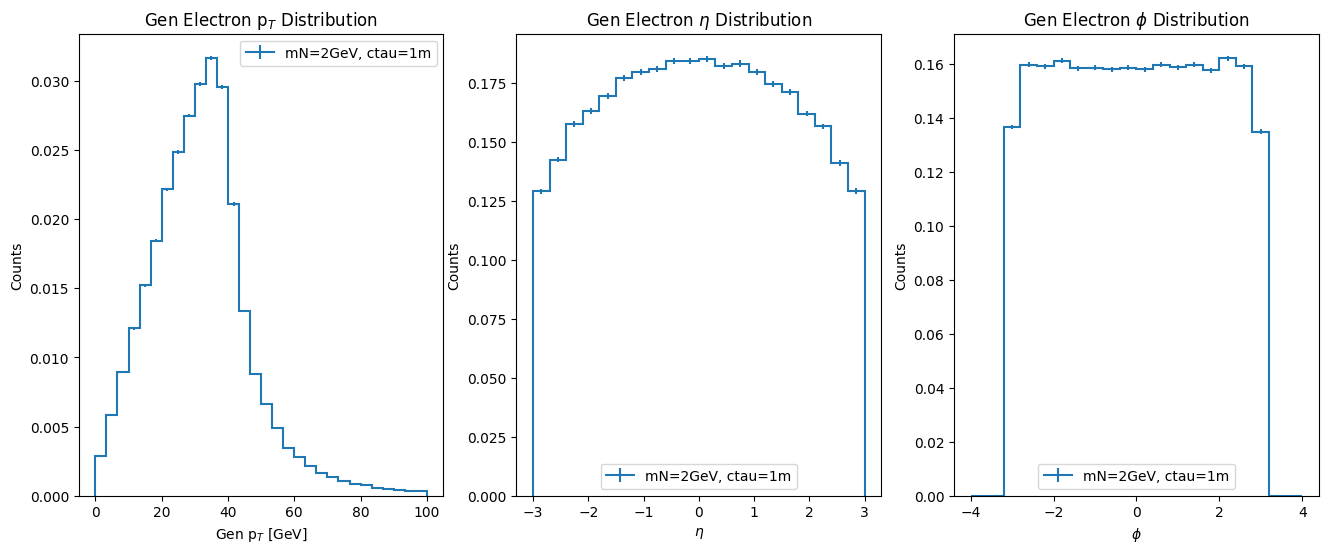

In [32]:
# gen-level tau properties
fig, axs = plt.subplots(1,3, figsize=(16,6))
signal_label = "mN=2GeV, ctau=1m"
data_label = "2024 Data"

#pT
h_pT = output["gLep_pt"]
h_pT.plot(ax=axs[0], label=signal_label, density=True)
axs[0].set_title(h_pT.metadata["title"])
axs[0].set_ylabel(h_pT.metadata["y_label"])
axs[0].legend()

#eta
h_eta = output["gLep_eta"]
h_eta.plot(ax=axs[1], label=signal_label, density=True)
axs[1].set_title(h_eta.metadata["title"])
axs[1].set_ylabel(h_eta.metadata["y_label"])
axs[1].legend()

#phi
h_phi = output["gLep_phi"]
h_phi.plot(ax=axs[2], label=signal_label, density=True)
axs[2].set_title(h_phi.metadata["title"])
axs[2].set_ylabel(h_phi.metadata["y_label"])
axs[2].legend()


plt.show()

### Gen LLP Kinematics

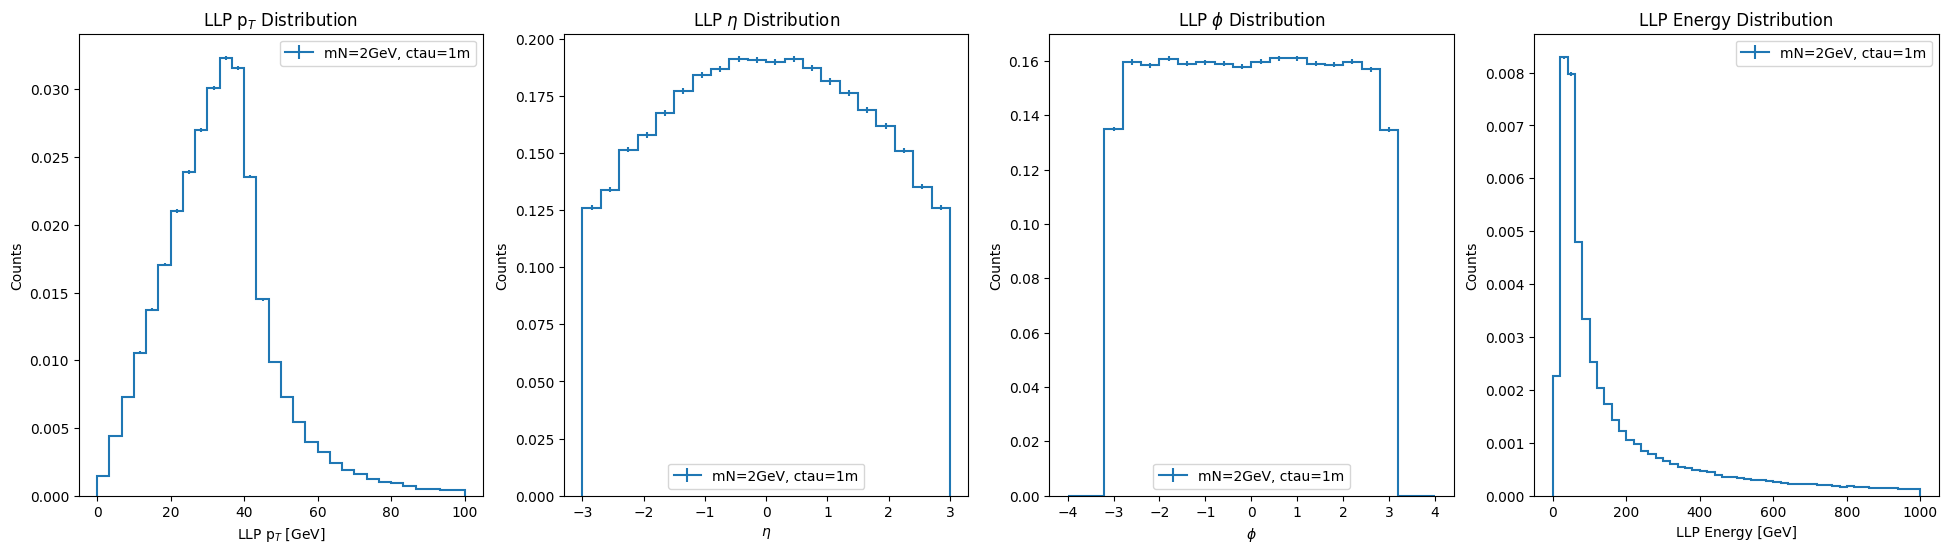

In [33]:
# gen-level LLP properties
fig, axs = plt.subplots(1,4, figsize=(24,6))
signal_label = "mN=2GeV, ctau=1m"
#pT
h_pT = output["gLLP_pt"]
h_pT.plot(ax=axs[0], label=signal_label, density=True)
axs[0].set_title(h_pT.metadata["title"])
axs[0].set_ylabel(h_pT.metadata["y_label"])
axs[0].legend()

#eta
h_eta = output["gLLP_eta"]
h_eta.plot(ax=axs[1], label=signal_label, density=True)
axs[1].set_title(h_eta.metadata["title"])
axs[1].set_ylabel(h_eta.metadata["y_label"])
axs[1].legend()

#phi
h_phi = output["gLLP_phi"]
h_phi.plot(ax=axs[2], label=signal_label, density=True)
axs[2].set_title(h_phi.metadata["title"])
axs[2].set_ylabel(h_phi.metadata["y_label"])
axs[2].legend()

#energy
h_e = output["gLLP_e"]
h_e.plot(ax=axs[3], label=signal_label, density=True)
axs[3].set_title(h_e.metadata["title"])
axs[3].set_ylabel(h_e.metadata["y_label"])
axs[3].legend()



plt.show()

### Gen LLP cTau and Fitting

In [34]:
def expo(x, c=100000, width=0.01):
    return c*np.exp(-width*x)

In [35]:
#get fit parameters
import scipy
h_ctau = output["gLLP_ctau"]
edges = h_ctau.axes[0].edges
centers = ((edges[:-1]+edges[1:])/2)
popt, pcov = scipy.optimize.curve_fit(expo, centers, h_ctau.view(), p0=[80000, 0.01])
popt

array([8.84798195e+04, 9.98035900e-03])

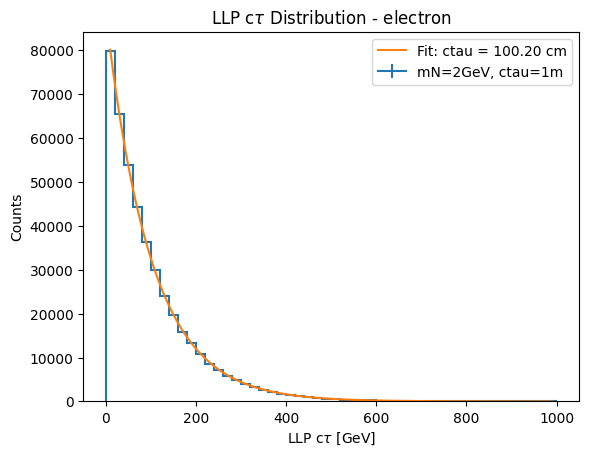

In [36]:
fig, ax = plt.subplots()
h_ctau.plot(ax=ax, label=signal_label)
x = np.linspace(centers[0], centers[-1], 1000)
y = expo(x, *popt)
ax.plot(x,y, label=f"Fit: ctau = {1/popt[1]:.2f} cm")
ax.set_title(h_ctau.metadata["title"] + " - electron")
ax.set_ylabel(h_ctau.metadata["y_label"])
ax.legend()


### Reco Level Electrons

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f3f4136e4f0>, errorbar=None, legend_artist=None)]

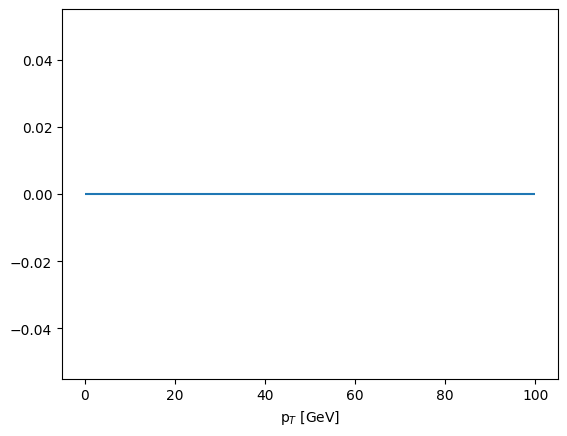

In [39]:
output_data.keys()
output_data['electron_pt'].plot()

/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-mplhep/0.3.47-aa724b8576f1a12e22c20eb37c88fad0/lib/python3.9/site-packages/mplhep/utils.py:273: RuntimeWarning: divide by zero encountered in scalar divide
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-mplhep/0.3.47-aa724b8576f1a12e22c20eb37c88fad0/lib/python3.9/site-packages/mplhep/utils.py:199: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-mplhep/0.3.47-aa724b8576f1a12e22c20eb37c88fad0/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-mplhep/0.3.47-aa724b8576f1a12e22c20eb37c88fad0/lib/python3.9/site-packages/mplhep/utils.py:245: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/cvmf

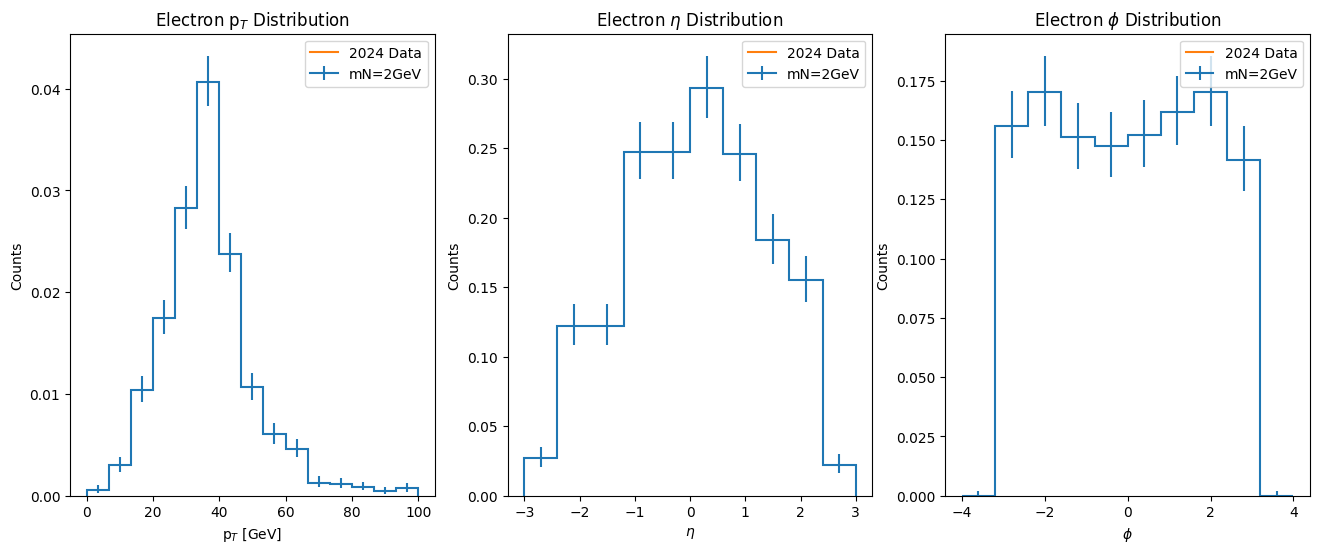

In [37]:
fig, axs = plt.subplots(1,3, figsize=(16,6))
signal_label = "mN=2GeV"
data_label = "2024 Data"

#pT
h_pT = output["electron_pt"]
h_pT_data = output_data["electron_pt"]
h_pT.plot(ax=axs[0], label=signal_label, density=True)
h_pT_data.plot(ax=axs[0], label=data_label, density=True)
axs[0].set_title(h_pT.metadata["title"])
axs[0].set_ylabel(h_pT.metadata["y_label"])
axs[0].legend()

#eta
h_eta = output["electron_eta"]
h_eta_data = output_data["electron_eta"]
h_eta.plot(ax=axs[1], label=signal_label, density=True)
h_eta_data.plot(ax=axs[1], label=data_label, density=True)
axs[1].set_title(h_eta.metadata["title"])
axs[1].set_ylabel(h_eta.metadata["y_label"])
axs[1].legend()

#phi
h_phi = output["electron_phi"]
h_phi_data = output_data["electron_phi"]
h_phi.plot(ax=axs[2], label=signal_label, density=True)
h_phi_data.plot(ax=axs[2], label=data_label, density=True)
axs[2].set_title(h_phi.metadata["title"])
axs[2].set_ylabel(h_phi.metadata["y_label"])
axs[2].legend()


plt.show()

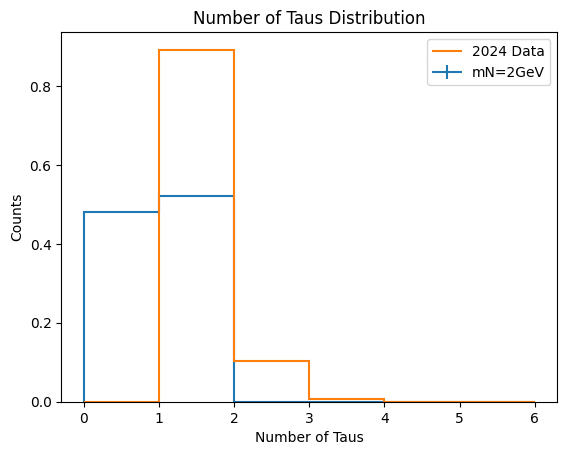

In [66]:
h = output["Num_Taus"]
h.plot(label = signal_label, density=True)
h_data = output_data["Num_Taus"]
h_data.plot(label = data_label, density=True)
plt.title(h.metadata["title"])
plt.ylabel(h.metadata["y_label"])
plt.legend()
plt.show()

### Fraction of Energy pT in visible gen tau and reco tau

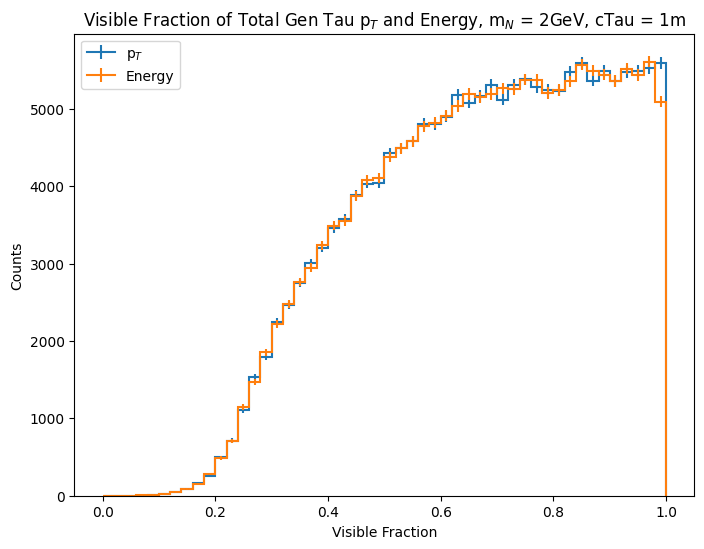

In [15]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
h = output["gVisTauFractionOfTotalPt"]
h.plot(label = "p${_T}$", ax=ax)
ax.set_title("Visible Fraction of Total Gen Tau p${_T}$ and Energy, m${_N}$ = 2GeV, cTau = 1m")
ax.set_ylabel(h.metadata["y_label"])
ax.set_xlabel("Visible Fraction")
ax.legend()

h = output["gVisTauFractionOfTotalEnergy"]
h.plot(label = "Energy", ax=ax)
# ax[1].set_title(h.metadata["title"])
# ax[1].set_ylabel(h.metadata["y_label"])
# ax[1].legend()
ax.legend()


78.0
78.0


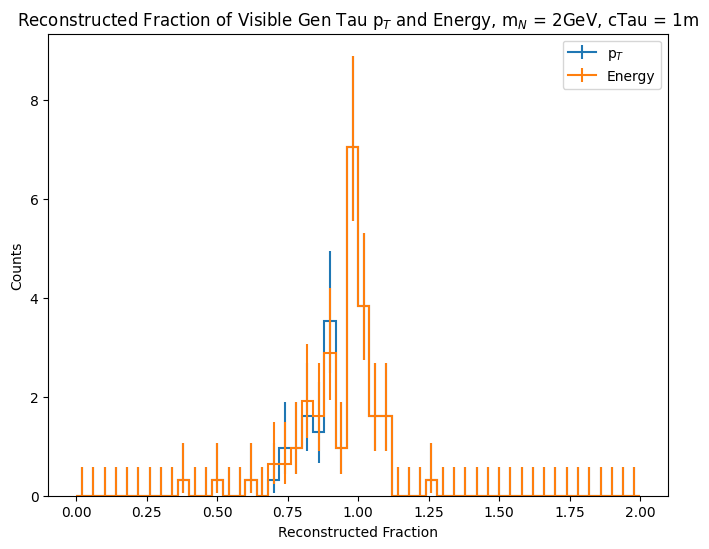

In [16]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
h = output["tauFractionOfGenVisPt"]
print(np.sum(h.values()))
h.plot(label = "p${_T}$", ax=ax, density=True)
ax.set_title("Reconstructed Fraction of Visible Gen Tau p${_T}$ and Energy, m${_N}$ = 2GeV, cTau = 1m")
ax.set_ylabel(h.metadata["y_label"])
ax.set_xlabel("Reconstructed Fraction")
ax.legend()

h = output["tauFractionOfGenVisEnergy"]
print(np.sum(h.values()))
h.plot(label = "Energy", ax=ax, density=True)
# ax[1].set_title(h.metadata["title"])
# ax[1].set_ylabel(h.metadata["y_label"])
# ax[1].legend()
ax.legend()



### Measurement of Reconstruction Efficiency and ID Efficiencies

78.0


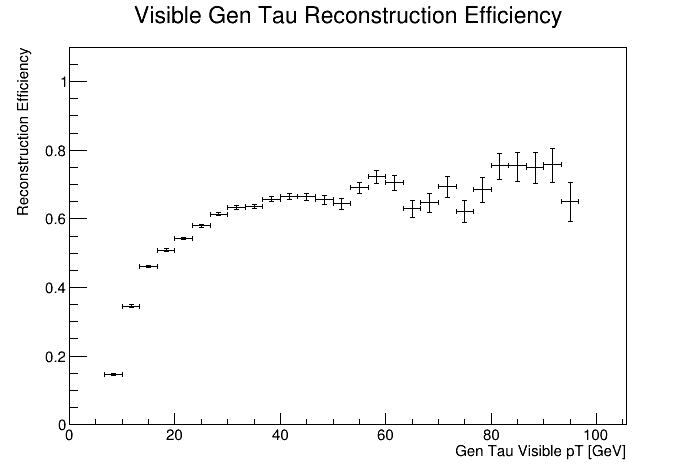

In [19]:
print(np.sum(h.values()))
eff = makeEfficiency(output["gVisTau_pt_matchedReco"], output["gVisTau_pt"])
C = ROOT.TCanvas()
eff.SetTitle("Visible Gen Tau Reconstruction Efficiency; Gen Tau Visible pT [GeV];Reconstruction Efficiency")
eff.Draw()
C.Draw()
eff.GetPaintedGraph().SetMinimum(0)
eff.GetPaintedGraph().SetMaximum(1.1)

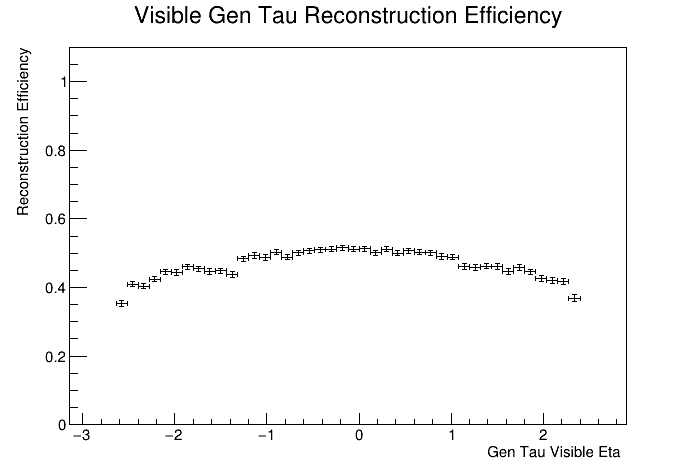

In [20]:
eff = makeEfficiency(output["gVisTau_eta_matchedReco"], output["gVisTau_eta"])
C = ROOT.TCanvas()
eff.SetTitle("Visible Gen Tau Reconstruction Efficiency; Gen Tau Visible Eta ;Reconstruction Efficiency")
eff.Draw()
C.Draw()
eff.GetPaintedGraph().SetMinimum(0)
eff.GetPaintedGraph().SetMaximum(1.1)

In [15]:
#replicating tau POG ID efficiency plot |eta|<2.3 for both num and denom
#remove all things cluster, trigger requirement, event
processor = HNL_Processor.HNL_Processor(isMC=True)
output_noID = processor.process(signal_events, hists_to_process=['gVisTau_pt', 'gVisTau_pt_matchedReco'], tau_cluster_topo_hists=False)
processor1 = HNL_Processor.HNL_Processor(isMC=True)
output_Loose = processor1.process(signal_events, hists_to_process=['gVisTau_pt', 'gVisTau_pt_matchedReco'], tauID="Loose", tau_cluster_topo_hists=False)
processor2 = HNL_Processor.HNL_Processor(isMC=True)
output_Medium = processor2.process(signal_events, hists_to_process=['gVisTau_pt', 'gVisTau_pt_matchedReco'], tauID="Medium", tau_cluster_topo_hists=False)
processor3 = HNL_Processor.HNL_Processor(isMC=True)
output_Tight = processor3.process(signal_events, hists_to_process=['gVisTau_pt', 'gVisTau_pt_matchedReco'], tauID="Tight", tau_cluster_topo_hists=False)

['gVisTau_pt', 'gVisTau_pt_matchedReco']
Generated Masks, Starting to Fill Event-Level Histograms
filling gen-level hists
filling reco taus hists
['gVisTau_pt', 'gVisTau_pt_matchedReco']
Generated Masks, Starting to Fill Event-Level Histograms
filling gen-level hists
filling reco taus hists
['gVisTau_pt', 'gVisTau_pt_matchedReco']
Generated Masks, Starting to Fill Event-Level Histograms
filling gen-level hists
filling reco taus hists
['gVisTau_pt', 'gVisTau_pt_matchedReco']
Generated Masks, Starting to Fill Event-Level Histograms
filling gen-level hists
filling reco taus hists


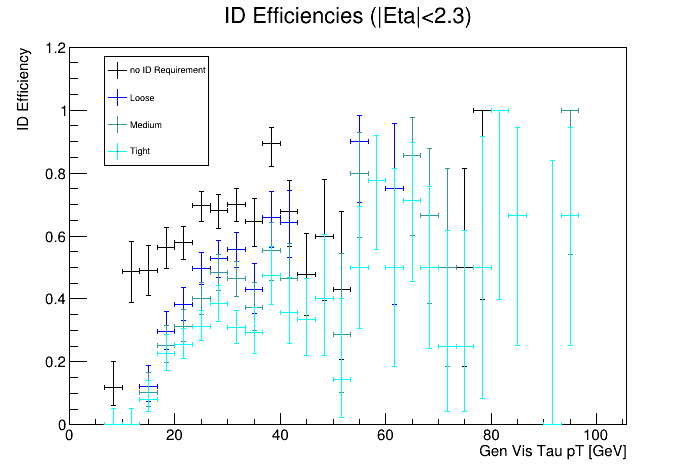

In [16]:
eff_noID = makeEfficiency(output_noID['gVisTau_pt_matchedReco'], output_noID['gVisTau_pt'])
eff_Loose = makeEfficiency(output_Loose['gVisTau_pt_matchedReco'], output_Loose['gVisTau_pt'])
eff_Medium = makeEfficiency(output_Medium['gVisTau_pt_matchedReco'], output_Medium['gVisTau_pt'])
eff_Tight = makeEfficiency(output_Tight['gVisTau_pt_matchedReco'], output_Tight['gVisTau_pt'])

C = ROOT.TCanvas()
eff_noID.SetTitle("ID Efficiencies (|Eta|<2.3); Gen Vis Tau pT [GeV];ID Efficiency")
eff_noID.SetLineColor(ROOT.kBlack)
eff_Loose.SetLineColor(ROOT.kBlue)
eff_Medium.SetLineColor(ROOT.kCyan-2)
eff_Tight.SetLineColor(ROOT.kCyan)

leg = ROOT.TLegend(0.15, 0.65, 0.3, 0.88)
leg.AddEntry(eff_noID, "no ID Requirement", "LEP")
leg.AddEntry(eff_Loose, "Loose", "LEP")
leg.AddEntry(eff_Medium, "Medium", "LEP")
leg.AddEntry(eff_Tight, "Tight", "LEP")

eff_noID.Draw()
eff_Loose.Draw("SAME")
eff_Medium.Draw("SAME")
eff_Tight.Draw("SAME")

leg.Draw("SAME")
C.Draw()
eff_noID.GetPaintedGraph().GetYaxis().SetRangeUser(0,1.2)

### Cluster and MET Properties

/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-mplhep/0.3.47-aa724b8576f1a12e22c20eb37c88fad0/lib/python3.9/site-packages/mplhep/utils.py:273: RuntimeWarning: divide by zero encountered in scalar divide
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-mplhep/0.3.47-aa724b8576f1a12e22c20eb37c88fad0/lib/python3.9/site-packages/mplhep/utils.py:199: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-mplhep/0.3.47-aa724b8576f1a12e22c20eb37c88fad0/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-mplhep/0.3.47-aa724b8576f1a12e22c20eb37c88fad0/lib/python3.9/site-packages/mplhep/utils.py:245: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/cvmf

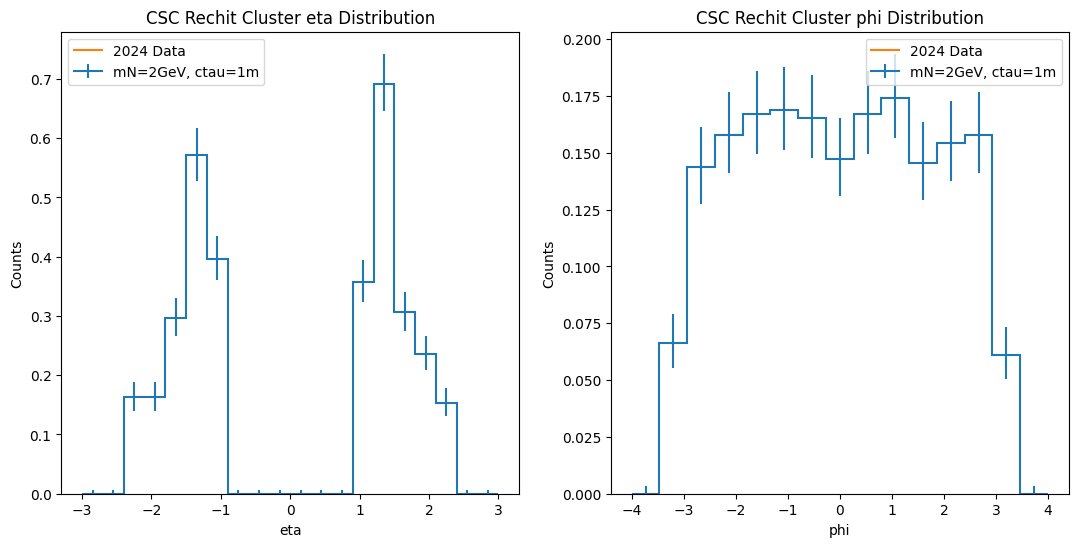

In [40]:
fig, axs = plt.subplots(1,2, figsize=(13,6))
signal_label = "mN=2GeV, ctau=1m"
data_label = "2024 Data"

#pT
h_pT = output["CSC_Cluster_Eta"]
h_pT_data = output_data["CSC_Cluster_Eta"]
h_pT.plot(ax=axs[0], label=signal_label, density=True)
h_pT_data.plot(ax=axs[0], label=data_label, density=True)
axs[0].set_title(h_pT.metadata["title"])
axs[0].set_ylabel(h_pT.metadata["y_label"])
axs[0].legend()

#eta
h_eta = output["CSC_Cluster_Phi"]
h_eta_data = output_data["CSC_Cluster_Phi"]
h_eta.plot(ax=axs[1], label=signal_label, density=True)
h_eta_data.plot(ax=axs[1], label=data_label, density=True)
axs[1].set_title(h_eta.metadata["title"])
axs[1].set_ylabel(h_eta.metadata["y_label"])
axs[1].legend()



plt.show()

/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-mplhep/0.3.47-aa724b8576f1a12e22c20eb37c88fad0/lib/python3.9/site-packages/mplhep/utils.py:273: RuntimeWarning: divide by zero encountered in scalar divide
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-mplhep/0.3.47-aa724b8576f1a12e22c20eb37c88fad0/lib/python3.9/site-packages/mplhep/utils.py:199: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-mplhep/0.3.47-aa724b8576f1a12e22c20eb37c88fad0/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-mplhep/0.3.47-aa724b8576f1a12e22c20eb37c88fad0/lib/python3.9/site-packages/mplhep/utils.py:245: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/cvmf

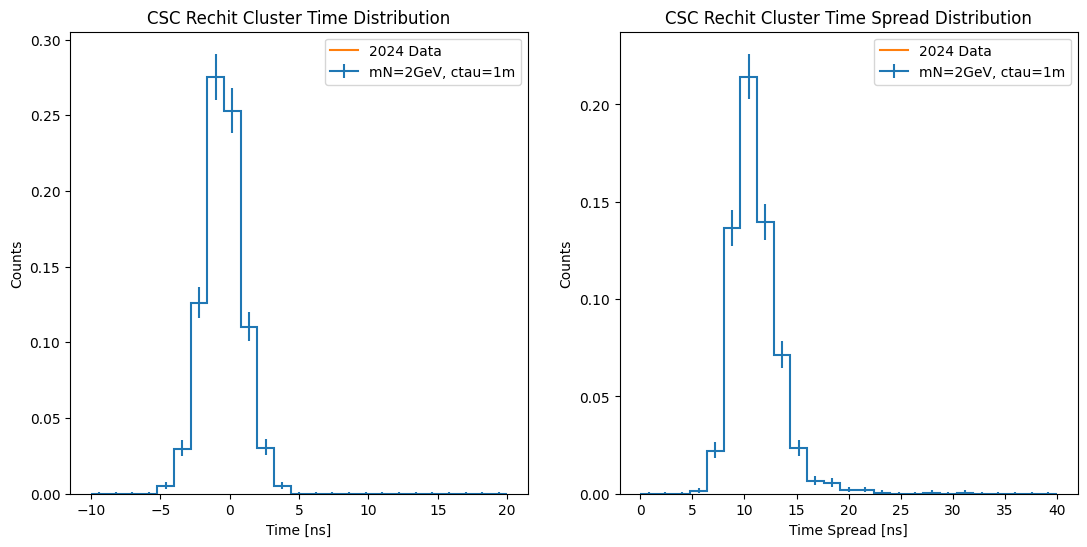

In [41]:
fig, axs = plt.subplots(1,2, figsize=(13,6))
signal_label = "mN=2GeV, ctau=1m"
data_label = "2024 Data"

#pT
h_pT = output["CSC_Cluster_Time"]
h_pT_data = output_data["CSC_Cluster_Time"]
h_pT.plot(ax=axs[0], label=signal_label, density=True)
h_pT_data.plot(ax=axs[0], label=data_label, density=True)
axs[0].set_title(h_pT.metadata["title"])
axs[0].set_ylabel(h_pT.metadata["y_label"])
axs[0].legend()

#eta
h_eta = output["CSC_Cluster_TimeSpread"]
h_eta_data = output_data["CSC_Cluster_TimeSpread"]
h_eta.plot(ax=axs[1], label=signal_label, density=True)
h_eta_data.plot(ax=axs[1], label=data_label, density=True)
axs[1].set_title(h_eta.metadata["title"])
axs[1].set_ylabel(h_eta.metadata["y_label"])
axs[1].legend()



plt.show()

/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-mplhep/0.3.47-aa724b8576f1a12e22c20eb37c88fad0/lib/python3.9/site-packages/mplhep/utils.py:273: RuntimeWarning: divide by zero encountered in scalar divide
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-mplhep/0.3.47-aa724b8576f1a12e22c20eb37c88fad0/lib/python3.9/site-packages/mplhep/utils.py:199: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-mplhep/0.3.47-aa724b8576f1a12e22c20eb37c88fad0/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-mplhep/0.3.47-aa724b8576f1a12e22c20eb37c88fad0/lib/python3.9/site-packages/mplhep/utils.py:245: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/cvmf

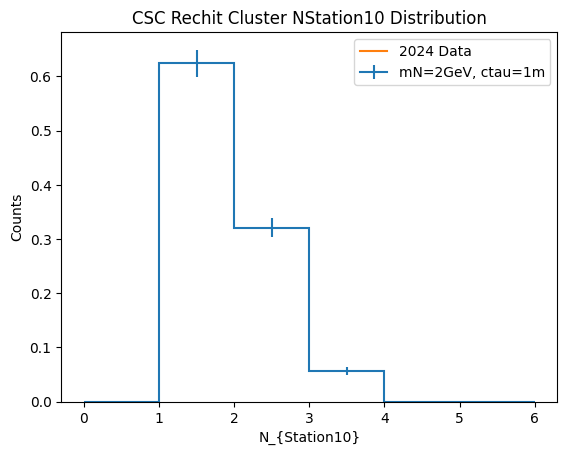

In [42]:
h_pT = output["CSC_Cluster_NStation10"]
h_pT_data = output_data["CSC_Cluster_NStation10"]
h_pT.plot(label=signal_label, density=True)
h_pT_data.plot(label=data_label, density=True)
plt.title(h_pT.metadata["title"])
plt.ylabel(h_pT.metadata["y_label"])
plt.legend()

/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-mplhep/0.3.47-aa724b8576f1a12e22c20eb37c88fad0/lib/python3.9/site-packages/mplhep/utils.py:273: RuntimeWarning: divide by zero encountered in scalar divide
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-mplhep/0.3.47-aa724b8576f1a12e22c20eb37c88fad0/lib/python3.9/site-packages/mplhep/utils.py:199: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-mplhep/0.3.47-aa724b8576f1a12e22c20eb37c88fad0/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-mplhep/0.3.47-aa724b8576f1a12e22c20eb37c88fad0/lib/python3.9/site-packages/mplhep/utils.py:245: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/cvmf

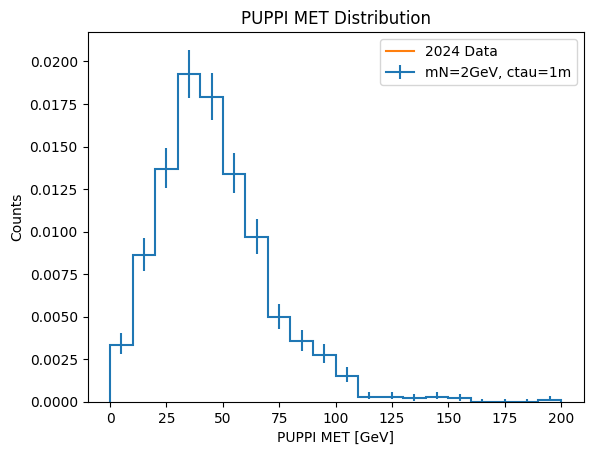

In [43]:
h_pT = output["PUPPI_MET"]
h_pT_data = output_data["PUPPI_MET"]
h_pT.plot(label=signal_label, density=True)
h_pT_data.plot(label=data_label, density=True)
plt.title(h_pT.metadata["title"])
plt.ylabel(h_pT.metadata["y_label"])
plt.legend()

### Discriminator Scores and Additional Tau ID Studies

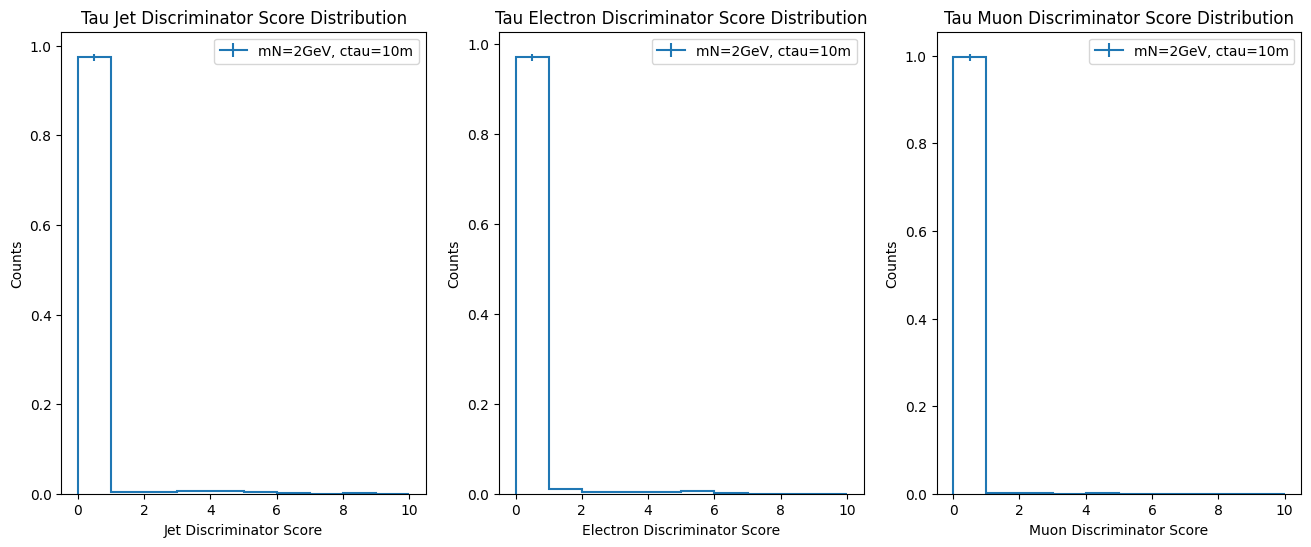

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(16,6))
data_label = "2024 Data"

#pT
h_jet = output["jet_discriminator_score"]
h_jet.plot(ax=axs[0], label=signal_label, density=True)
#h_jet_data = output_data["jet_discriminator_score"]
#h_jet_data.plot(ax=axs[0], label=data_label, density=True)
axs[0].set_title(h_jet.metadata["title"])
axs[0].set_ylabel(h_jet.metadata["y_label"])
axs[0].legend()

#eta
h_ele = output["ele_discriminator_score"]
h_ele.plot(ax=axs[1], label=signal_label, density=True)
#h_ele_data = output_data["ele_discriminator_score"]
#h_ele_data.plot(ax=axs[1], label=data_label, density=True)
axs[1].set_title(h_ele.metadata["title"])
axs[1].set_ylabel(h_ele.metadata["y_label"])
axs[1].legend()

#phi
h_mu = output["mu_discriminator_score"]
h_mu.plot(ax=axs[2], label=signal_label, density=True)
#h_mu_data = output_data["mu_discriminator_score"]
#h_mu_data.plot(ax=axs[2], label=data_label, density=True)
axs[2].set_title(h_mu.metadata["title"])
axs[2].set_ylabel(h_mu.metadata["y_label"])
axs[2].legend()


plt.show()

In [78]:
output_data.keys()

dict_keys(['Num_Taus', 'tau_pt', 'tau_eta', 'tau_phi', 'tau_e', 'tauFractionOfGenVisPt', 'tauFractionOfGenVisEnergy'])

In [50]:
processor = HNL_Processor.HNL_Processor(isMC=True)
output_visTau = processor.process(signal_events, hists_to_process = ["gVisTau_pt_matchedReco", "gVisTau_pt"])

['gVisTau_pt_matchedReco', 'gVisTau_pt']
Generated Masks, Starting to Fill Event-Level Histograms
filling gen-level hists
filling reco taus hists


In [ ]:
fig, axs = plt.subplots(1,3, figsize=(16,6))
signal_label = "mN=2GeV, ctau=10m"
data_label = "2024 Data"

#pT
h_jet = output["jet_discriminator_score"]
h_jet.plot(ax=axs[0], label=signal_label, density=True)
axs[0].set_title(h_jet.metadata["title"])
axs[0].set_ylabel(h_jet.metadata["y_label"])
axs[0].legend()

#eta
h_ele = output["ele_discriminator_score"]
h_ele.plot(ax=axs[1], label=signal_label, density=True)
axs[1].set_title(h_ele.metadata["title"])
axs[1].set_ylabel(h_ele.metadata["y_label"])
axs[1].legend()

#phi
h_mu = output["mu_discriminator_score"]
h_mu.plot(ax=axs[2], label=signal_label, density=True)
axs[2].set_title(h_mu.metadata["title"])
axs[2].set_ylabel(h_mu.metadata["y_label"])
axs[2].legend()


plt.show()

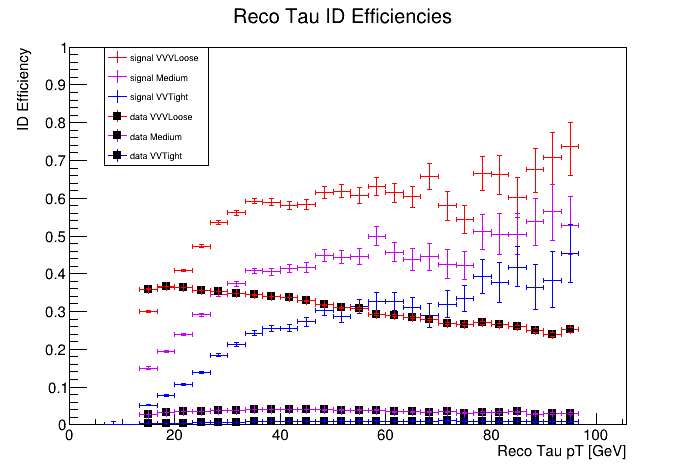

In [22]:
eff_signal_vvvloose = makeEfficiency(output["tau_pt_pass_vvvlooseID"], output["tau_pt"])
eff_signal_medium = makeEfficiency(output["tau_pt_pass_mediumID"], output["tau_pt"])
eff_signal_vvtight = makeEfficiency(output["tau_pt_pass_vvtightID"], output["tau_pt"])
eff_data_vvvloose = makeEfficiency(output_data["tau_pt_pass_vvvlooseID"], output_data["tau_pt"])
eff_data_medium = makeEfficiency(output_data["tau_pt_pass_mediumID"], output_data["tau_pt"])
eff_data_vvtight = makeEfficiency(output_data["tau_pt_pass_vvtightID"], output_data["tau_pt"])
C = ROOT.TCanvas()
eff_signal_vvvloose.SetTitle("Reco Tau ID Efficiencies; Reco Tau pT [GeV];ID Efficiency")
eff_signal_vvvloose.SetLineColor(ROOT.kRed)
eff_signal_medium.SetLineColor(ROOT.kViolet)
eff_signal_vvtight.SetLineColor(ROOT.kBlue)
eff_data_vvvloose.SetLineColor(ROOT.kRed)
eff_data_medium.SetLineColor(ROOT.kViolet)
eff_data_vvtight.SetLineColor(ROOT.kBlue)
eff_data_vvvloose.SetMarkerStyle(21)
eff_data_medium.SetMarkerStyle(21)
eff_data_vvtight.SetMarkerStyle(21)
leg = ROOT.TLegend(0.15, 0.65, 0.3, 0.9)
leg.AddEntry(eff_signal_vvvloose, "signal VVVLoose", "LEP")
leg.AddEntry(eff_signal_medium, "signal Medium", "LEP")
leg.AddEntry(eff_signal_vvtight, "signal VVTight", "LEP")
leg.AddEntry(eff_data_vvvloose, "data VVVLoose", "LEP")
leg.AddEntry(eff_data_medium, "data Medium", "LEP")
leg.AddEntry(eff_data_vvtight, "data VVTight", "LEP")
eff_signal_vvvloose.Draw()
eff_signal_medium.Draw("SAME")
eff_signal_vvtight.Draw("SAME")
eff_data_vvvloose.Draw("SAME")
eff_data_medium.Draw("SAME")
eff_data_vvtight.Draw("SAME")
leg.Draw("SAME")
C.Draw()
eff_signal_vvvloose.GetPaintedGraph().GetYaxis().SetRangeUser(0,1)

Text(0.5, 1.0, 'Fraction of Taus Passing Each ID WP')

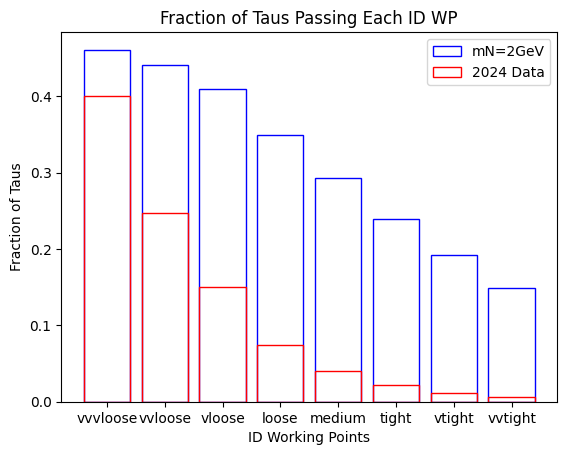

In [ ]:
#make bar chart with fraction of taus passing each ID working point
fraction_passing = {}
categories = ['vvvloose', 'vvloose', 'vloose', 'loose', 'medium', 'tight', 'vtight', 'vvtight']
for hist_name in list(output.keys()):
    if "tau" and "ID" in hist_name:
        counts = output[hist_name].counts()
        fraction_passing[hist_name] = counts[1]/(counts[0]+counts[1])
        #print((counts[0]+counts[1]))

fraction_passing_data = {}
for hist_name in list(output_data.keys()):
    if "tau" and "ID" in hist_name:
        counts = output_data[hist_name].counts()
        fraction_passing_data[hist_name] = counts[1]/(counts[0]+counts[1])
        #print((counts[0]+counts[1]))

plt.bar(categories,list(fraction_passing.values()), facecolor='none', edgecolor='blue', label=signal_label)
plt.bar(categories,list(fraction_passing_data.values()), facecolor='none', edgecolor='red', label=data_label)
plt.legend()
plt.xlabel("ID Working Points")
plt.ylabel("Fraction of Taus")
plt.title("Fraction of Taus Passing Each ID WP")